In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.text_proc import illustration

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

# Import data

In [5]:
df = pd.read_csv("data/gojek_review_sentiment.csv")
df.head()

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive


In [6]:
df.rate.value_counts(normalize=True)

rate
negative    0.595398
positive    0.404602
Name: proportion, dtype: float64

# Dataset Splitting

In [8]:
X = df.review
y = df.rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1425,), (357,), (1425,), (357,))

# Training

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [10]:
pipeline = Pipeline([
    ("prep", TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ("algo", SVC(max_iter=500))
])
model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train);

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarn

{'algo__C': 1.368979599359222, 'algo__gamma': 0.36749049453053273}
0.9585964912280702 0.89472586787524 0.8907563025210085


# Evaluation

In [11]:
from jcopml.plot import plot_confusion_matrix

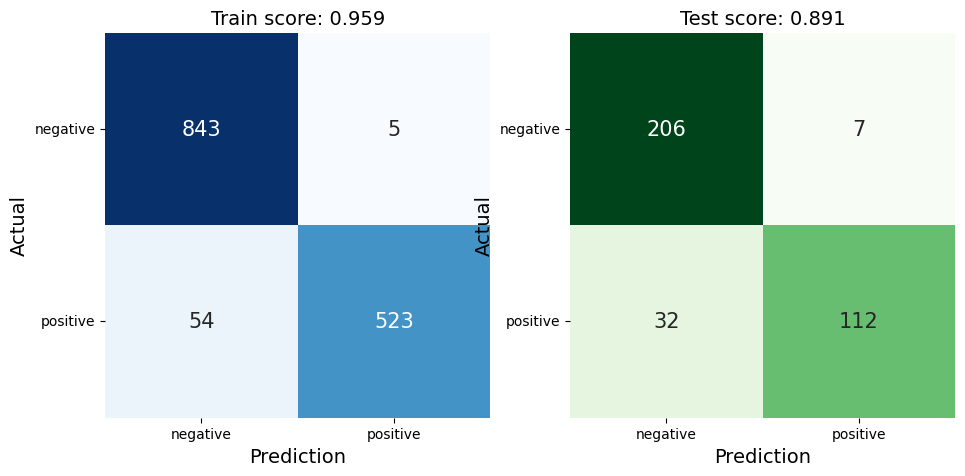

In [12]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

# Sanity Check

In [18]:
text = ["aplikasi kaya anjing enak banget"]
model.predict(text)

array(['negative'], dtype=object)